In [2]:
file_path="C:\\Users\\KIIT\\Downloads\\new.csv"

**Read Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(file_path, names=["Timestamp", "Duration", "Type", "Level",
                                      "Client", "Client ID", "Query ID",
                                      "Query Name", "View", "Recursion",
                                      "Query Type", "Query", "Class",
                                      "Record Type", "Flags", "IP Address"],low_memory=False)
df.head()

Timestamp Duration      Type  Level  Client        Client ID      Query ID  \
0  16-Apr-24  39:39.0  queries:  info:  client  @0x7fcce4635788  -2.82709E+18   
1  16-Apr-24  39:39.0  queries:  info:  client  @0x7fcd701f0568   1.77013E+18   
2  16-Apr-24  39:39.1  queries:  info:  client  @0x7fcd6058ebe8  -8.23585E+18   
3  16-Apr-24  39:39.1  queries:  info:  client  @0x7fcce415d148  -3.32225E+17   
4  16-Apr-24  39:39.1  queries:  info:  client  @0x7fcd704779a8  -5.39787E+18   

                            Query Name  View   Recursion Query Type  \
0  (mlflowlb.cvw.qa.dbrailguide.info):  view  recursive:     query:   
1      (wxwork-edis.deutschebahn.org):  view  recursive:     query:   
2         (suggestqueries.google.com):  view  recursive:     query:   
3                                 (.):  view  recursive:     query:   
4    (dr1-secure.origin.dbenergie.de):  view  recursive:     query:   

                              Query Class Record Type   Flags  \
0  mlflowlb.cvw.qa.dbrailguide.info    IN           A       +   
1      wxwork-edis.deutschebahn.org    IN           A       +   
2         suggestqueries.google.com    IN           A       +   
3                                 .    IN           A  #NAME?   
4    dr1-secure.origin.dbenergie.de    IN           A       +   

         IP Address  
0  (103.58.120.120)  
1  (103.58.120.120)  
2  (103.58.120.120)  
3  (103.58.120.120)  
4  (103.58.120.120)

**Check dataset property**

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

null_values = df.isnull().sum()
print("Null values :\n",null_values)

Number of rows: 66219
Number of columns: 16
Null values :
 Timestamp       0
Duration        0
Type            0
Level           0
Client          0
Client ID       0
Query ID        0
Query Name      0
View            0
Recursion       0
Query Type      0
Query           0
Class           0
Record Type     0
Flags           8
IP Address     24
dtype: int64


In [5]:
# Displaying rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls.head())

      Timestamp Duration      Type  Level Client Client ID         Query ID  \
5082  16-Apr-24  40:48.9  queries:  debug  03:00    client  @0x7fcdcc652198   
5085  16-Apr-24  40:48.9  queries:  debug  03:00    client  @0x7fcdcc64b528   
5088  16-Apr-24  40:48.9  queries:  debug  03:00    client  @0x7fcdcc5dad48   
5098  16-Apr-24  40:49.0  queries:  debug  03:00    client  @0x7fcdcc5dad48   
5100  16-Apr-24  40:49.0  queries:  debug  03:00    client  @0x7fcdcc64b528   

        Query Name                                    View Recursion  \
5082  -2.73642E+18  (content-signature-2.cdn.mozilla.net):      view   
5085  -2.73642E+18  (content-signature-2.cdn.mozilla.net):      view   
5088  -2.73642E+18  (content-signature-2.cdn.mozilla.net):      view   
5098  -2.73642E+18  (content-signature-2.cdn.mozilla.net):      view   
5100  -2.73642E+18  (content-signature-2.cdn.mozilla.net):      view   

      Query Type    Query Class Record Type Flags IP Address  
5082  recursive:  looking   f

**Data Cleaning**

In [6]:
# Dropping null values
df.dropna(inplace=True)

# Verify that the rows with null values have been dropped
print(df.isnull().sum())
print(df.shape)

Timestamp      0
Duration       0
Type           0
Level          0
Client         0
Client ID      0
Query ID       0
Query Name     0
View           0
Recursion      0
Query Type     0
Query          0
Class          0
Record Type    0
Flags          0
IP Address     0
dtype: int64
(66195, 16)


**Feature selection**

In [7]:
# List of columns to select
columns_to_select = ["Timestamp", "Duration", "Client", "Client ID", "Query ID", "Query", "Class", "Record Type", "Flags", "IP Address"]

# Select the specified columns
selected_df = df[columns_to_select]

# Display the first few rows of the selected DataFrame
print(selected_df.head())

   Timestamp Duration  Client        Client ID      Query ID  \
0  16-Apr-24  39:39.0  client  @0x7fcce4635788  -2.82709E+18   
1  16-Apr-24  39:39.0  client  @0x7fcd701f0568   1.77013E+18   
2  16-Apr-24  39:39.1  client  @0x7fcd6058ebe8  -8.23585E+18   
3  16-Apr-24  39:39.1  client  @0x7fcce415d148  -3.32225E+17   
4  16-Apr-24  39:39.1  client  @0x7fcd704779a8  -5.39787E+18   

                              Query Class Record Type   Flags  \
0  mlflowlb.cvw.qa.dbrailguide.info    IN           A       +   
1      wxwork-edis.deutschebahn.org    IN           A       +   
2         suggestqueries.google.com    IN           A       +   
3                                 .    IN           A  #NAME?   
4    dr1-secure.origin.dbenergie.de    IN           A       +   

         IP Address  
0  (103.58.120.120)  
1  (103.58.120.120)  
2  (103.58.120.120)  
3  (103.58.120.120)  
4  (103.58.120.120)  


**Transforming**

In [8]:
# Convert the "Timestamp" column to datetime with error handling
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Verify the conversion
print(df['Timestamp'].head())
print(df['Timestamp'].dtype)

0   2024-04-16
1   2024-04-16
2   2024-04-16
3   2024-04-16
4   2024-04-16
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66195 entries, 0 to 66218
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    66195 non-null  datetime64[ns]
 1   Duration     66195 non-null  object        
 2   Type         66195 non-null  object        
 3   Level        66195 non-null  object        
 4   Client       66195 non-null  object        
 5   Client ID    66195 non-null  object        
 6   Query ID     66195 non-null  object        
 7   Query Name   66195 non-null  object        
 8   View         66195 non-null  object        
 9   Recursion    66195 non-null  object        
 10  Query Type   66195 non-null  object        
 11  Query        66195 non-null  object        
 12  Class        66195 non-null  object        
 13  Record Type  66195 non-null  object        
 14  Flags        66195 non-null  object        
 15  IP Address   66195 non-null  object        
dtypes: d

**Date time stamp**

In [10]:
import pandas as pd

# Define the function to format time
def format_time(time_str):
  try:
      # Split the time string into minutes, seconds, and tenths of a second
      minutes, rest = time_str.split(':')
      seconds, tenths = rest.split('.')

      # Convert to integers
      minutes = int(minutes)
      seconds = int(seconds)
      milliseconds = int(tenths) * 100  # Convert tenths of a second to milliseconds

      # Calculate total milliseconds
      total_milliseconds = (minutes * 60 * 1000) + (seconds * 1000) + milliseconds

      # Convert to timedelta
      time_delta = pd.to_timedelta(total_milliseconds, unit='ms')

      # Format the time
      formatted_time = f"{time_delta.components.hours:02}:{time_delta.components.minutes:02}:{time_delta.components.seconds:02}.{time_delta.components.milliseconds:03}"
      return formatted_time
  except Exception as e:
      print(f"Error formatting time: {time_str} - {e}")
      return None  # Return None for invalid entries

# Create a copy of the DataFrame
selected_columns = selected_df.copy()

# Apply the function to each row
selected_columns['time'] = selected_columns['Duration'].apply(format_time)

# Convert the 'time' column to timedelta type
selected_columns['time'] = pd.to_timedelta(selected_columns['time'])

# Format the 'time' column to remove "0 days"
selected_columns['time'] = selected_columns['time'].apply(lambda x: f"{x.components.hours:02}:{x.components.minutes:02}:{x.components.seconds:02}.{x.components.milliseconds:03}")

# Print the updated DataFrame
print(selected_columns.head())

   Timestamp Duration  Client        Client ID      Query ID  \
0  16-Apr-24  39:39.0  client  @0x7fcce4635788  -2.82709E+18   
1  16-Apr-24  39:39.0  client  @0x7fcd701f0568   1.77013E+18   
2  16-Apr-24  39:39.1  client  @0x7fcd6058ebe8  -8.23585E+18   
3  16-Apr-24  39:39.1  client  @0x7fcce415d148  -3.32225E+17   
4  16-Apr-24  39:39.1  client  @0x7fcd704779a8  -5.39787E+18   

                              Query Class Record Type   Flags  \
0  mlflowlb.cvw.qa.dbrailguide.info    IN           A       +   
1      wxwork-edis.deutschebahn.org    IN           A       +   
2         suggestqueries.google.com    IN           A       +   
3                                 .    IN           A  #NAME?   
4    dr1-secure.origin.dbenergie.de    IN           A       +   

         IP Address          time  
0  (103.58.120.120)  00:39:39.000  
1  (103.58.120.120)  00:39:39.000  
2  (103.58.120.120)  00:39:39.100  
3  (103.58.120.120)  00:39:39.100  
4  (103.58.120.120)  00:39:39.100  


**Selecting and dropping feature column**

In [11]:
selected_columns = selected_columns.drop('Duration', axis=1)
print(selected_columns.head())

   Timestamp  Client        Client ID      Query ID  \
0  16-Apr-24  client  @0x7fcce4635788  -2.82709E+18   
1  16-Apr-24  client  @0x7fcd701f0568   1.77013E+18   
2  16-Apr-24  client  @0x7fcd6058ebe8  -8.23585E+18   
3  16-Apr-24  client  @0x7fcce415d148  -3.32225E+17   
4  16-Apr-24  client  @0x7fcd704779a8  -5.39787E+18   

                              Query Class Record Type   Flags  \
0  mlflowlb.cvw.qa.dbrailguide.info    IN           A       +   
1      wxwork-edis.deutschebahn.org    IN           A       +   
2         suggestqueries.google.com    IN           A       +   
3                                 .    IN           A  #NAME?   
4    dr1-secure.origin.dbenergie.de    IN           A       +   

         IP Address          time  
0  (103.58.120.120)  00:39:39.000  
1  (103.58.120.120)  00:39:39.000  
2  (103.58.120.120)  00:39:39.100  
3  (103.58.120.120)  00:39:39.100  
4  (103.58.120.120)  00:39:39.100  


In [12]:
# Combine 'Timestamp' and 'time' columns into a single datetime column
selected_columns['Timestamp'] = pd.to_datetime(selected_columns['Timestamp']) + pd.to_timedelta(selected_columns['time'])

# Drop the 'time' column as it's now incorporated into 'Timestamp'
selected_columns = selected_columns.drop('time', axis=1)

# Print the updated DataFrame
print(selected_columns.head())

                Timestamp  Client        Client ID      Query ID  \
0 2024-04-16 00:39:39.000  client  @0x7fcce4635788  -2.82709E+18   
1 2024-04-16 00:39:39.000  client  @0x7fcd701f0568   1.77013E+18   
2 2024-04-16 00:39:39.100  client  @0x7fcd6058ebe8  -8.23585E+18   
3 2024-04-16 00:39:39.100  client  @0x7fcce415d148  -3.32225E+17   
4 2024-04-16 00:39:39.100  client  @0x7fcd704779a8  -5.39787E+18   

                              Query Class Record Type   Flags  \
0  mlflowlb.cvw.qa.dbrailguide.info    IN           A       +   
1      wxwork-edis.deutschebahn.org    IN           A       +   
2         suggestqueries.google.com    IN           A       +   
3                                 .    IN           A  #NAME?   
4    dr1-secure.origin.dbenergie.de    IN           A       +   

         IP Address  
0  (103.58.120.120)  
1  (103.58.120.120)  
2  (103.58.120.120)  
3  (103.58.120.120)  
4  (103.58.120.120)  


In [13]:
selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66195 entries, 0 to 66218
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    66195 non-null  datetime64[ns]
 1   Client       66195 non-null  object        
 2   Client ID    66195 non-null  object        
 3   Query ID     66195 non-null  object        
 4   Query        66195 non-null  object        
 5   Class        66195 non-null  object        
 6   Record Type  66195 non-null  object        
 7   Flags        66195 non-null  object        
 8   IP Address   66195 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 5.1+ MB


**Regex and query patterns**

In [14]:
import re
import pandas as pd

# Define the regular expressions
regex_patterns = {
  "service_specific_dns": r"^_ldap\._tcp\.dc\._msdcs\.[A-Z]+\.[A-Z]+$",
  "uuid_based_service_specific_dns": r"^_ldap\._tcp\.[0-9a-fA-F-]{36}\.domains\._msdcs\.[A-Z]+\.[A-Z]+$",
  "standard_hostname_domain": r"^[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",
  "complex_subdomain_structure": r"^[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",
  "standard_hostname_subdomain": r"^[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",
  "simple_domain": r"^[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # Added to match simple domains like "amazon.com"
  "single_label_domain": r"^[a-zA-Z0-9-]+$",  # Added to match single label domains like "."
  "extended_subdomain_structure": r"^[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # Extended subdomain structure
  "another_extended_subdomain_structure": r"^[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # Another extended subdomain structure
  "ip_based_subdomain": r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # IP-based subdomain
  "complex_ip_based_subdomain": r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # Complex IP-based subdomain
  "subdomain_with_underscore": r"^[a-zA-Z0-9-_]+\.[a-zA-Z0-9-]+\.[a-zA-Z0-9-]+\.[a-zA-Z]{2,}$",  # Subdomain with underscore
  "complex_subdomain_with_underscore": r"^[a-zA-Z0-9-_]+\.[a-zA-Z0-9-_]+\.[a-zA-Z0-9-_]+\.[a-zA-Z0-9-_]+\.[a-zA-Z]{2,}$"  # Complex subdomain with underscore
}


# Extract query names
query_names = selected_columns['Query'].tolist()

# Function to match query names to regex patterns
def match_query_names(query_names, regex_patterns):
  matches = {}
  for name in query_names:
      for pattern_name, pattern in regex_patterns.items():
          if re.match(pattern, name):
              matches[name] = pattern_name
              break
  return matches

# Match the query names
matched_queries = match_query_names(query_names, regex_patterns)

# Print the results
for query, pattern_name in matched_queries.items():
  print(f"Query: {query} matches pattern: {pattern_name}")



Query: mlflowlb.cvw.qa.dbrailguide.info matches pattern: another_extended_subdomain_structure
Query: wxwork-edis.deutschebahn.org matches pattern: standard_hostname_domain
Query: suggestqueries.google.com matches pattern: standard_hostname_domain
Query: dr1-secure.origin.dbenergie.de matches pattern: standard_hostname_subdomain
Query: amazon.com matches pattern: simple_domain
Query: wikipedia.org matches pattern: simple_domain
Query: pekorp.jetos.com matches pattern: standard_hostname_domain
Query: int.bill.kleinerice.com matches pattern: standard_hostname_subdomain
Query: egrosoftware.web167.chi1.roblox.com matches pattern: another_extended_subdomain_structure
Query: bst-c4ed0893-8355-4a93-8f5e-53d2db03f7f9-1.assets.kucoin.com matches pattern: standard_hostname_subdomain
Query: techconference.at.w0135808.rhein-alp.eu matches pattern: another_extended_subdomain_structure
Query: ip-10-0-35-178.cn-northwest-1.compute.dbfzi.com matches pattern: another_extended_subdomain_structure
Query: 

**IP Address and Time stamp duration**

In [15]:
"""import pandas as pd

# Clean up the 'IP Address' column by removing parentheses
# str.replace(r'[()]', '', regex=True) removes both opening and closing parentheses in one go
selected_columns['IP Address'] = selected_columns['IP Address'].str.replace(r'[()]', '', regex=True)

# Set the 'Timestamp' column as the index and ensure it's in datetime format
selected_columns['Timestamp'] = pd.to_datetime(selected_columns['Timestamp'])
#selected_columns.set_index('Timestamp', inplace=True)

# Get unique IP addresses in the DataFrame
unique_ip_addresses = selected_columns['IP Address'].unique()

# Iterate through each unique IP address
for ip_address in unique_ip_addresses:
  # Filter the DataFrame by the current IP address
  filtered_df = selected_columns[selected_columns['IP Address'] == ip_address]

  # Ensure the DataFrame is sorted by index (timestamp) before resampling
  filtered_df = filtered_df.sort_index()

  # Resample the data to the desired time intervals and count the number of queries
  resampled_30min = filtered_df.resample('30T').size()
  resampled_1hour = filtered_df.resample('1H').size()
  resampled_1day = filtered_df.resample('1D').size()
  resampled_3days = filtered_df.resample('3D').size()

  # Combine the results into a DataFrame
  results = pd.DataFrame({
      '30min': resampled_30min,
      '1hour': resampled_1hour,
      '1day': resampled_1day,
      '3days': resampled_3days
  }).fillna(0).astype(int)

  # Print the results for the current IP address
  print(f"\nResampled results for IP address {ip_address}:")
  print(results)"""

'import pandas as pd\n\n# Clean up the \'IP Address\' column by removing parentheses\n# str.replace(r\'[()]\', \'\', regex=True) removes both opening and closing parentheses in one go\nselected_columns[\'IP Address\'] = selected_columns[\'IP Address\'].str.replace(r\'[()]\', \'\', regex=True)\n\n# Set the \'Timestamp\' column as the index and ensure it\'s in datetime format\nselected_columns[\'Timestamp\'] = pd.to_datetime(selected_columns[\'Timestamp\'])\n#selected_columns.set_index(\'Timestamp\', inplace=True)\n\n# Get unique IP addresses in the DataFrame\nunique_ip_addresses = selected_columns[\'IP Address\'].unique()\n\n# Iterate through each unique IP address\nfor ip_address in unique_ip_addresses:\n  # Filter the DataFrame by the current IP address\n  filtered_df = selected_columns[selected_columns[\'IP Address\'] == ip_address]\n\n  # Ensure the DataFrame is sorted by index (timestamp) before resampling\n  filtered_df = filtered_df.sort_index()\n\n  # Resample the data to the de

**Using regex extract domain name**

In [17]:
# Define a regex pattern to extract the domain name
# This pattern captures the domain name and its extension
domain_pattern = r'^(?:https?://)?(?:www\.)?([^/]+)'

# Extract the domain name from the 'Query' column
selected_columns['domain'] = selected_columns['Query'].str.extract(domain_pattern)

# Print the DataFrame to see the new 'domain' column
selected_columns

Timestamp  Client        Client ID      Query ID  \
0     2024-04-16 00:39:39.000  client  @0x7fcce4635788  -2.82709E+18   
1     2024-04-16 00:39:39.000  client  @0x7fcd701f0568   1.77013E+18   
2     2024-04-16 00:39:39.100  client  @0x7fcd6058ebe8  -8.23585E+18   
3     2024-04-16 00:39:39.100  client  @0x7fcce415d148  -3.32225E+17   
4     2024-04-16 00:39:39.100  client  @0x7fcd704779a8  -5.39787E+18   
...                       ...     ...              ...           ...   
66214 2024-04-16 00:55:09.600  client  @0x7fcd0c0b8c58  -6.81805E+18   
66215 2024-04-16 00:55:09.600  client  @0x7fcd24671b48  -9.21942E+18   
66216 2024-04-16 00:55:09.600  client  @0x7fcd044c8618   9.96056E+17   
66217 2024-04-16 00:55:09.600  client  @0x7fcda0488578  -8.23585E+18   
66218 2024-04-16 00:55:09.600  client  @0x7fcce804b598  -8.23585E+18   

                                                  Query Class Record Type  \
0                      mlflowlb.cvw.qa.dbrailguide.info    IN           A   
1                          wxwork-edis.deutschebahn.org    IN           A   
2                             suggestqueries.google.com    IN           A   
3                                                     .    IN           A   
4                        dr1-secure.origin.dbenergie.de    IN           A   
...                                                 ...   ...         ...   
66214                                     wikipedia.org    IN           A   
66215  lima.az-integration-testcluster-60e97.reddit.com    IN           A   
66216                             si.cdn.dbschenker.app    IN           A   
66217                            gateway.zscalertwo.net    IN           A   
66218                                a.root-servers.net    IN           A   

        Flags        IP Address  \
0           +  (103.58.120.120)   
1           +  (103.58.120.120)   
2           +  (103.58.120.120)   
3      #NAME?  (103.58.120.120)   
4           +  (103.58.120.120)   
...       ...               ...   
66214       +  (103.58.120.120)   
66215       +  (103.58.120.120)   
66216       +  (103.58.120.120)   
66217       +  (103.58.120.120)   
66218       +  (103.58.120.120)   

                                                 domain  
0                      mlflowlb.cvw.qa.dbrailguide.info  
1                          wxwork-edis.deutschebahn.org  
2                             suggestqueries.google.com  
3                                                     .  
4                        dr1-secure.origin.dbenergie.de  
...                                                 ...  
66214                                     wikipedia.org  
66215  lima.az-integration-testcluster-60e97.reddit.com  
66216                             si.cdn.dbschenker.app  
66217                            gateway.zscalertwo.net  
66218                                a.root-servers.net  

[66195 rows x 10 columns]

**Read Domain_label.txt**

In [19]:
domain_data=pd.read_csv("C:\\Users\\KIIT\\Downloads\\domain_labels.txt",sep="\t")
domain_data.head()

fmcdg2.db-schenker.biz,False
0  compute.regio-bayerisch-schwaben.de,False
1                           amazon.com,False
2                        wikipedia.org,False
3           bank.dbdialog.eu,True,Benign,Low
4        moncompte.cogeco.ca,True,Benign,Low

**Read data from each column**

In [20]:
# Read data from the text file
with open('C:\\Users\\KIIT\\Downloads\\domain_labels.txt', 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    line = line.strip()
    parts = line.split(',') + [""] * (4 - len(line.split(',')))
    data.append(parts)
column1, column2, column3, column4 = zip(*data)
print("Column 1:", list(column1))
print("Column 2:", list(column2))
print("Column 3:", list(column3))
print("Column 4:", list(column4))

Column 1: ['fmcdg2.db-schenker.biz', 'compute.regio-bayerisch-schwaben.de', 'amazon.com', 'wikipedia.org', 'bank.dbdialog.eu', 'moncompte.cogeco.ca', 'eoffice.gov.in', 'lunaful.yorouto.com', 'sandbox-financing-v2.streckenkunde.net', 'core.windows.net', 'comp.transfracht.com', 'hq-rdgateway.dbbahnbau.de', 'e430226325c8.kucoin.com', 'gardner.dbservicepoint.de', 'milton.dbservices.de', 's3.amazonaws.com', 'play.googleapis.com', '80-110-22-240.xn--dsseldorf-hauptbahnhof-slc.de', 'vpnsyl1.karlsruhe-hbf.de', 'a.root-servers.net', 'saltare.railstar.com', '81-223-162-102.6-seen.de', 'ec2.wiesbaden-hbf.de', 'transmath.deutsche-bahn.li', 'comp.europa-spezial.com', 'rp.roblox.com', 'research.att.com', 'pa1ipwanfw2a-0108a.dbjomp.com', 'rum.duss-terminal-italia.com', 'production.dbintermodal.se', 'hrmintegration-qa.dbbahnbau.de', 'prd.everyworks.net', 'tf-dev-pipeid-af568.transfracht.de', 'pool.ntp.org', 'protection.sabzlearn.ir', 'nonprod.db-schenker.biz', 'perizinan.db-schenker.ec', 'uat.digitale

**Display text file data as dataFrame**

In [21]:
data_1=pd.DataFrame({"domain_name":list(column1),"categorized":list(column2),"category":list(column3),"risk":list(column4)})#.map({"False":0,"True":1,"Benign":0,"Low":1})
data_1

domain_name categorized category risk
0                  fmcdg2.db-schenker.biz       False              
1     compute.regio-bayerisch-schwaben.de       False              
2                              amazon.com       False              
3                           wikipedia.org       False              
4                        bank.dbdialog.eu        True   Benign  Low
...                                   ...         ...      ...  ...
2241                   acloud.yorouto.com        True   Benign  Low
2242                  sxm.analyse-bahn.de        True   Benign  Low
2243        p06-mailws.db-gebrauchtbus.de        True   Benign  Low
2244  fa-manuals.keinjobwiejederandere.de        True   Benign  Low
2245           nsgcloud.fahrziel-natur.de        True   Benign  Low

[2246 rows x 4 columns]

**Map and replace values**

In [22]:
print(data_1["categorized"].unique())
data_1["categorized"]=data_1["categorized"].replace({"False":0,"True":1})

print(data_1["category"].unique())
data_1["category"]=data_1["category"].replace({"Benign":1})

print(data_1["risk"].unique())
data_1["risk"]=data_1["risk"].replace({"Low":0})

data_1.head()

['False' 'True']
['' 'Benign']
['' 'Low']


domain_name  categorized category risk
0               fmcdg2.db-schenker.biz            0              
1  compute.regio-bayerisch-schwaben.de            0              
2                           amazon.com            0              
3                        wikipedia.org            0              
4                     bank.dbdialog.eu            1        1    0

**Final Dataset**

In [23]:
selected_columns.join(data_1)

Timestamp  Client        Client ID      Query ID  \
0     2024-04-16 00:39:39.000  client  @0x7fcce4635788  -2.82709E+18   
1     2024-04-16 00:39:39.000  client  @0x7fcd701f0568   1.77013E+18   
2     2024-04-16 00:39:39.100  client  @0x7fcd6058ebe8  -8.23585E+18   
3     2024-04-16 00:39:39.100  client  @0x7fcce415d148  -3.32225E+17   
4     2024-04-16 00:39:39.100  client  @0x7fcd704779a8  -5.39787E+18   
...                       ...     ...              ...           ...   
66214 2024-04-16 00:55:09.600  client  @0x7fcd0c0b8c58  -6.81805E+18   
66215 2024-04-16 00:55:09.600  client  @0x7fcd24671b48  -9.21942E+18   
66216 2024-04-16 00:55:09.600  client  @0x7fcd044c8618   9.96056E+17   
66217 2024-04-16 00:55:09.600  client  @0x7fcda0488578  -8.23585E+18   
66218 2024-04-16 00:55:09.600  client  @0x7fcce804b598  -8.23585E+18   

                                                  Query Class Record Type  \
0                      mlflowlb.cvw.qa.dbrailguide.info    IN           A   
1                          wxwork-edis.deutschebahn.org    IN           A   
2                             suggestqueries.google.com    IN           A   
3                                                     .    IN           A   
4                        dr1-secure.origin.dbenergie.de    IN           A   
...                                                 ...   ...         ...   
66214                                     wikipedia.org    IN           A   
66215  lima.az-integration-testcluster-60e97.reddit.com    IN           A   
66216                             si.cdn.dbschenker.app    IN           A   
66217                            gateway.zscalertwo.net    IN           A   
66218                                a.root-servers.net    IN           A   

        Flags        IP Address  \
0           +  (103.58.120.120)   
1           +  (103.58.120.120)   
2           +  (103.58.120.120)   
3      #NAME?  (103.58.120.120)   
4           +  (103.58.120.120)   
...       ...               ...   
66214       +  (103.58.120.120)   
66215       +  (103.58.120.120)   
66216       +  (103.58.120.120)   
66217       +  (103.58.120.120)   
66218       +  (103.58.120.120)   

                                                 domain  \
0                      mlflowlb.cvw.qa.dbrailguide.info   
1                          wxwork-edis.deutschebahn.org   
2                             suggestqueries.google.com   
3                                                     .   
4                        dr1-secure.origin.dbenergie.de   
...                                                 ...   
66214                                     wikipedia.org   
66215  lima.az-integration-testcluster-60e97.reddit.com   
66216                             si.cdn.dbschenker.app   
66217                            gateway.zscalertwo.net   
66218                                a.root-servers.net   

                               domain_name  categorized category risk  
0                   fmcdg2.db-schenker.biz          0.0                
1      compute.regio-bayerisch-schwaben.de          0.0                
2                               amazon.com          0.0                
3                            wikipedia.org          0.0                
4                         bank.dbdialog.eu          1.0        1    0  
...                                    ...          ...      ...  ...  
66214                                  NaN          NaN      NaN  NaN  
66215                                  NaN          NaN      NaN  NaN  
66216                                  NaN          NaN      NaN  NaN  
66217                                  NaN          NaN      NaN  NaN  
66218                                  NaN          NaN      NaN  NaN  

[66195 rows x 14 columns]

In [24]:
import pandas as pd

# Clean up the 'IP Address' column by removing parentheses
# str.replace(r'[()]', '', regex=True) removes both opening and closing parentheses in one go
selected_columns['IP Address'] = selected_columns['IP Address'].str.replace(r'[()]', '', regex=True)

# Set the 'Timestamp' column as the index and ensure it's in datetime format
selected_columns['Timestamp'] = pd.to_datetime(selected_columns['Timestamp'])
selected_columns.set_index('Timestamp', inplace=True)

# Get unique IP addresses in the DataFrame
unique_ip_addresses = selected_columns['IP Address'].unique()

# Iterate through each unique IP address
for ip_address in unique_ip_addresses:
  # Filter the DataFrame by the current IP address
  filtered_df = selected_columns[selected_columns['IP Address'] == ip_address]

  # Ensure the DataFrame is sorted by index (timestamp) before resampling
  filtered_df = filtered_df.sort_index()

  # Resample the data to the desired time intervals and count the number of queries
  resampled_30min = filtered_df.resample('30T').size()
  resampled_1hour = filtered_df.resample('1H').size()
  resampled_1day = filtered_df.resample('1D').size()
  resampled_3days = filtered_df.resample('3D').size()

  # Combine the results into a DataFrame
  results = pd.DataFrame({
      '30min': resampled_30min,
      '1hour': resampled_1hour,
      '1day': resampled_1day,
      '3days': resampled_3days
  }).fillna(0).astype(int)

  # Print the results for the current IP address
  print(f"\nResampled results for IP address {ip_address}:")
  print(results)


Resampled results for IP address 103.58.120.120:
                     30min  1hour   1day  3days
Timestamp                                      
2024-04-16 00:00:00      0  65163  65163  65163
2024-04-16 00:30:00  65163      0      0      0

Resampled results for IP address 127.0.0.1:
                     30min  1hour  1day  3days
Timestamp                                     
2024-04-16 00:00:00      0    624   624    624
2024-04-16 00:30:00    624      0     0      0

Resampled results for IP address 2405:8a00:8001::20:
                     30min  1hour  1day  3days
Timestamp                                     
2024-04-16 00:00:00      0    400   400    400
2024-04-16 00:30:00    400      0     0      0

Resampled results for IP address is:
                     30min  1hour  1day  3days
Timestamp                                     
2024-04-16 00:00:00      0      8     8      8
2024-04-16 00:30:00      8      0     0      0


In [25]:
selected_columns.columns

Index(['Client', 'Client ID', 'Query ID', 'Query', 'Class', 'Record Type',
       'Flags', 'IP Address', 'domain'],
      dtype='object')

**LSTM model**

**1. Importing libraries**

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


**2. Load data feature column**

In [27]:
# Load the DataFrame (assuming you have the data in a CSV file)


# Select the relevant columns
selected_columns = selected_columns[['Client', 'Client ID', 'Query ID', 'Query', 'Class', 'Record Type', 'Flags', 'IP Address', 'domain']]

# For this example, we'll use 'Query ID' as the target to predict
# You can choose any other numerical column if needed


**3. Data Preprocessing**

In [28]:
# Check and remove non-numeric values from 'Query ID'
selected_columns['Query ID'] = pd.to_numeric(selected_columns['Query ID'], errors='coerce')
selected_columns = selected_columns.dropna(subset=['Query ID'])

# Scale the 'Query ID' column (or any other numerical column you choose to predict)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(selected_columns['Query ID'].values.reshape(-1, 1))

# Convert the DataFrame to a format suitable for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the number of previous steps to consider for prediction (e.g., 60)
time_step = 60

# Create the dataset for training
X, y = create_dataset(scaled_data, time_step)

# Reshape the input to be [samples, time steps, features] as required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


**4. Build the LSTM Model**

In [29]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**5. Train the Model**

In [30]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 119s 67ms/step - loss: 0.0990
Epoch 2/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 112s 68ms/step - loss: 0.0965
Epoch 3/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 111s 67ms/step - loss: 0.0956
Epoch 4/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 112s 68ms/step - loss: 0.0957
Epoch 5/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 111s 67ms/step - loss: 0.0962
Epoch 6/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 112s 68ms/step - loss: 0.0965
Epoch 7/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 113s 68ms/step - loss: 0.0957
Epoch 8/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 113s 69ms/step - loss: 0.0957
Epoch 9/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 115s 70ms/step - loss: 0.0959
Epoch 10/10
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 115s 69ms/step - loss: 0.0954


**6. Make Predictions and Visualize the Results**

1654/1654 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step
414/414 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step


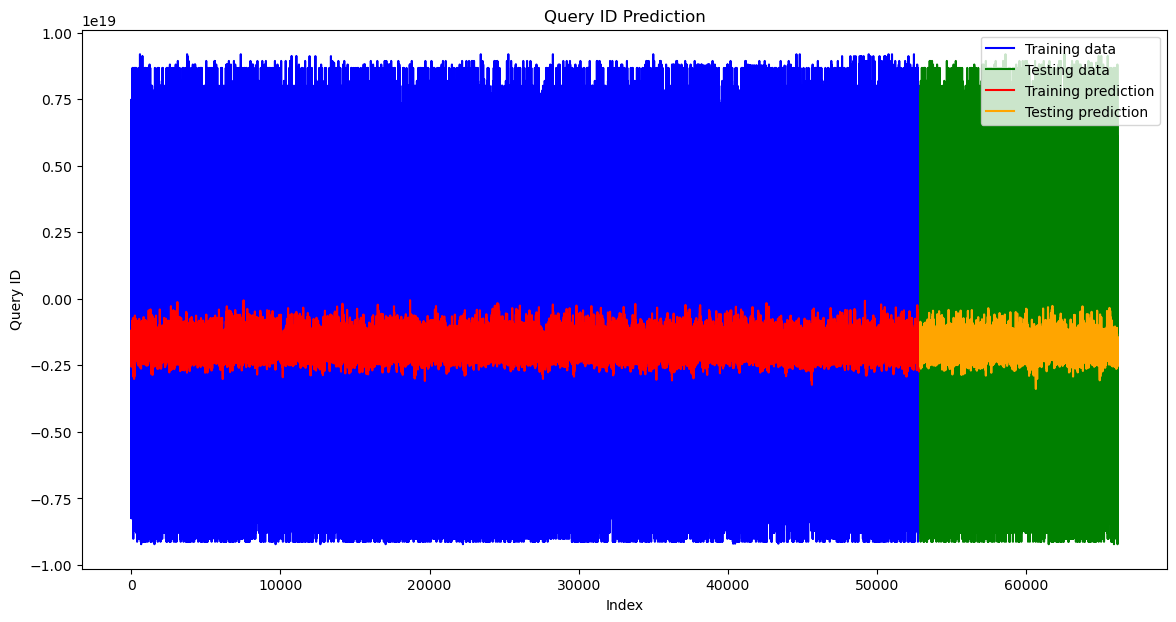

In [31]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(range(len(y_train_actual)), y_train_actual, color='blue', label='Training data')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, color='green', label='Testing data')
plt.plot(range(len(y_train_actual)), train_predict, color='red', label='Training prediction')
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_predict, color='orange', label='Testing prediction')
plt.title('Query ID Prediction')
plt.xlabel('Index')
plt.ylabel('Query ID')
plt.legend()
plt.show()


**7. Evaluation Metrics**

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse_train = mean_squared_error(y_train_actual, train_predict)
mse_test = mean_squared_error(y_test_actual, test_predict)

mae_train = mean_absolute_error(y_train_actual, train_predict)
mae_test = mean_absolute_error(y_test_actual, test_predict)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train_actual, train_predict)
r2_test = r2_score(y_test_actual, test_predict)

# Print metrics
print("Training : ")
print(f"Train MSE: {mse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print("\nTesting : ")
print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")


Training : 
Train MSE: 3.2638005574451715e+37
Train MAE: 5.058793324675856e+18
Train RMSE: 5.712968193019432e+18
Train R^2: 0.0031653597863560146

Testing : 
Test MSE: 3.085350155638407e+37
Test MAE: 4.889165033967558e+18
Test RMSE: 5.554592834437468e+18
Test R^2: -0.004559446135492307
